In [1]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2
import pytesseract
from detectron2 import model_zoo

# Layout-parser Example 1

In [39]:
ocr_agent = lp.ocr.TesseractAgent()

In [40]:
image = cv2.imread("/Volumes/DATA_LAKE/example_images/page.png")

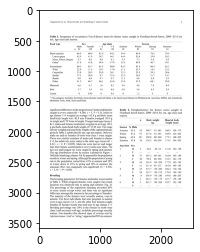

In [41]:
plt.imshow(image);

In [42]:
%%time
res = ocr_agent.detect(image, return_response=True)

CPU times: user 1.86 s, sys: 56.7 ms, total: 1.91 s
Wall time: 12.2 s


In [43]:
res

{'text': 'Clapperton et al.: Ship rat diet and breeding in beech forest 3\n\nTable 1. Frequency of occurrence (%) of dietary items for Rattus rattus caught in Fiordland beech forest, 2009-2010, by\nsex, age class and season.\n\n \n\n \n\nFood type Sex Age class Season\nMale Female 1-2 3-6 Autumn Winter Spring Summer\nn 22 105 62 165 18 83 92 34\nPlant material 86.9 80.9 83.9 84.2 94.4 89.9 78.3 79.4\nLeaves/grass 45.9 41.9 38.7 46.1 44.4 55.4 35.9 38.2\nMoss, lichen, fungus 3.3 8.6 4.8 6.1 5.5 7.2 5.4 2.9\nOther! 51.6 43.8 48.4 47.9 55.5 49.4 46.7 44.1\nInvertebrate 80.3 82.7 85.5 80.0 83.3 81.9 80.4 82.3\nWeta 22.9 11.4 19.3 17.0 11.1 15.7 18.5 23.5\nCaterpillar 23.8 30.5 29.0 26.1 33.3 25.3 29.3 20.6\nSpider 17.2 20.9 9.7 22.4 22.2 16.9 21.7 14.7\nBeetle 9.8 4.8 9.7 6.7 11.1 4.8 9.8 5.9\nOther 61.5 66.7 66.1 63.0 55.6 67.5 64.1 58.8\nMammal 6.6 6.7 1.6 8.5 5.6 4.8 7.6 8.8\nBird 5.7 1.9 1.6 4.8 5.6 3.6 4.3 2.9\nLizard 0) 0.95 0) 0.6 0) 1.2 0 0\n\n \n\n! This category includes the fine

## Deep Learning Detection

In [44]:
%%time
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_101_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


CPU times: user 1.01 s, sys: 662 ms, total: 1.68 s
Wall time: 1.9 s


In [45]:
layout = model.detect(image)

In [47]:
layout[0]

TextBlock(block=Rectangle(x_1=174.82327270507812, y_1=513.6779174804688, x_2=2346.93408203125, y_2=1403.648193359375), text=None, id=None, type=Table, parent=None, next=None, score=0.9937644004821777)

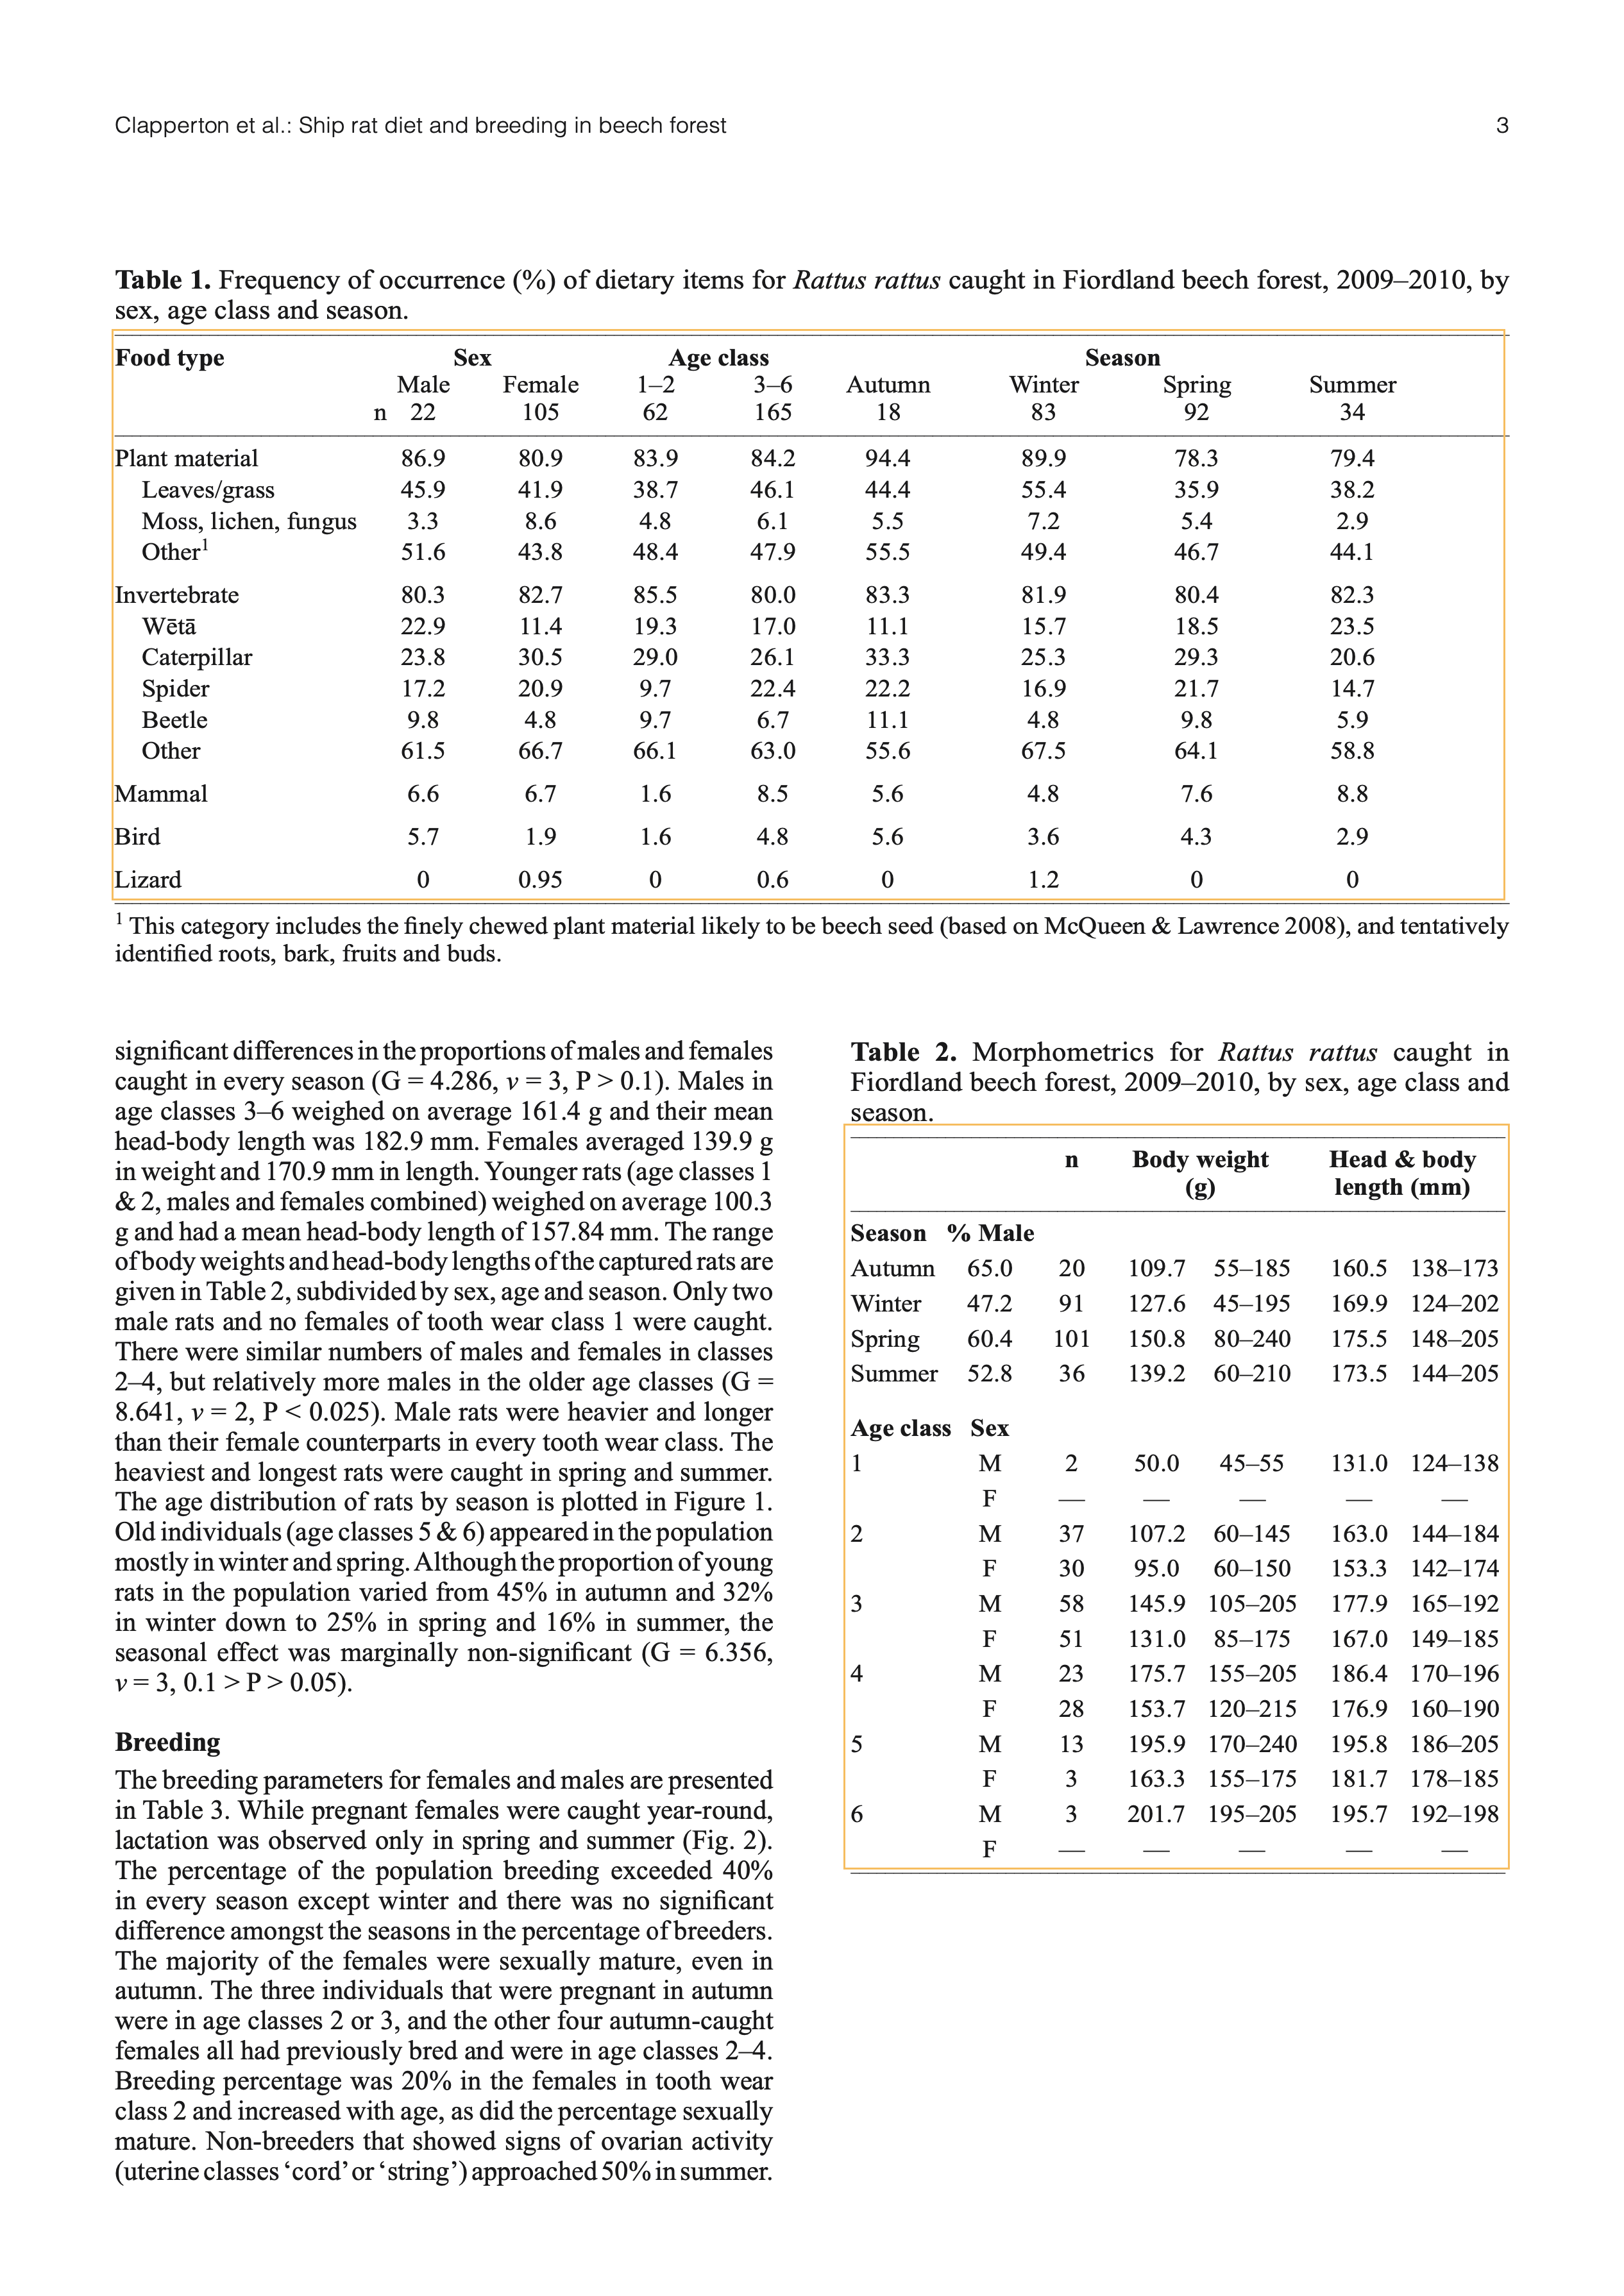

In [9]:
lp.draw_box(image, layout, box_width=3)

### Grabbing text from regions

In [48]:
type(layout)

layoutparser.elements.Layout

Only grab the Tables that are detected on the page, not the other sections/figures.

In [49]:
tables = lp.Layout([b for b in layout if b.type == 'Table'])
    

In [50]:
%%time
for t in tables:
    segment_image = (t
                    .pad(left=5, right=5, top=5, bottom=5)
                    .crop_image(image))
    text = ocr_agent.detect(segment_image)
    t.set(text=text, inplace=True)

CPU times: user 793 ms, sys: 45.8 ms, total: 839 ms
Wall time: 5.02 s


In [51]:
for txt in tables.get_texts():
    print(txt, end='\n---\n')

 

 

Food type Age class
Male Female 1-2 3-6 Autumn Winter Spring Summer
n 22 105 62 165 18 83 92 34
Plant material 86.9 80.9 83.9 84.2 94.4 89.9 78.3 79.4
Leaves/grass 45.9 41.9 38.7 46.1 44.4 55.4 35.9 38.2
Moss, lichen, fungus 3.3 8.6 4.8 6.1 5.5 7.2 5.4 2.9
Other! 51.6 43.8 48.4 47.9 55.5 49.4 46.7 44.1
Invertebrate 80.3 82.7 85.5 80.0 83.3 81.9 80.4 82.3
Weta 22.9 11.4 19.3 17.0 11.1 15.7 18.5 23.5
Caterpillar 23.8 30.5 29.0 26.1 33.3 25.3 29.3 20.6
Spider 17.2 20.9 9.7 22.4 22.2 16.9 21.7 14.7
Beetle 9.8 4.8 9.7 6.7 11.1 4.8 9.8 5.9
Other 61.5 66.7 66.1 63.0 55.6 67.5 64.1 58.8
Mammal 6.6 6.7 1.6 8.5 5.6 4.8 7.6 8.8
Bird 5.7 1.9 1.6 4.8 5.6 3.6 4.3 2.9
Lizard 0) 0.95 0) 0.6 0) 1.2 0 0

---
 

 

 

n Body weight Head & body
(g) length (mm)
Season % Male
Autumn 65.0 20 109.7 55-185 160.5 138-173
Winter 47.2 91 127.6 45-195 169.9 124-202
Spring 60.4 101 150.8 80-240 175.5 148-205
Summer 52.8 36 =. 139.2, 60-210 =—:173.5 144-205
Age class Sex
1 M 2 50.0 45-55 131.0 124-138
F
2 M 3

### First Table

In [52]:
print(tables.get_texts()[0])

 

 

Food type Age class
Male Female 1-2 3-6 Autumn Winter Spring Summer
n 22 105 62 165 18 83 92 34
Plant material 86.9 80.9 83.9 84.2 94.4 89.9 78.3 79.4
Leaves/grass 45.9 41.9 38.7 46.1 44.4 55.4 35.9 38.2
Moss, lichen, fungus 3.3 8.6 4.8 6.1 5.5 7.2 5.4 2.9
Other! 51.6 43.8 48.4 47.9 55.5 49.4 46.7 44.1
Invertebrate 80.3 82.7 85.5 80.0 83.3 81.9 80.4 82.3
Weta 22.9 11.4 19.3 17.0 11.1 15.7 18.5 23.5
Caterpillar 23.8 30.5 29.0 26.1 33.3 25.3 29.3 20.6
Spider 17.2 20.9 9.7 22.4 22.2 16.9 21.7 14.7
Beetle 9.8 4.8 9.7 6.7 11.1 4.8 9.8 5.9
Other 61.5 66.7 66.1 63.0 55.6 67.5 64.1 58.8
Mammal 6.6 6.7 1.6 8.5 5.6 4.8 7.6 8.8
Bird 5.7 1.9 1.6 4.8 5.6 3.6 4.3 2.9
Lizard 0) 0.95 0) 0.6 0) 1.2 0 0



In [53]:
tables.get_texts()

[' \n\n \n\nFood type Age class\nMale Female 1-2 3-6 Autumn Winter Spring Summer\nn 22 105 62 165 18 83 92 34\nPlant material 86.9 80.9 83.9 84.2 94.4 89.9 78.3 79.4\nLeaves/grass 45.9 41.9 38.7 46.1 44.4 55.4 35.9 38.2\nMoss, lichen, fungus 3.3 8.6 4.8 6.1 5.5 7.2 5.4 2.9\nOther! 51.6 43.8 48.4 47.9 55.5 49.4 46.7 44.1\nInvertebrate 80.3 82.7 85.5 80.0 83.3 81.9 80.4 82.3\nWeta 22.9 11.4 19.3 17.0 11.1 15.7 18.5 23.5\nCaterpillar 23.8 30.5 29.0 26.1 33.3 25.3 29.3 20.6\nSpider 17.2 20.9 9.7 22.4 22.2 16.9 21.7 14.7\nBeetle 9.8 4.8 9.7 6.7 11.1 4.8 9.8 5.9\nOther 61.5 66.7 66.1 63.0 55.6 67.5 64.1 58.8\nMammal 6.6 6.7 1.6 8.5 5.6 4.8 7.6 8.8\nBird 5.7 1.9 1.6 4.8 5.6 3.6 4.3 2.9\nLizard 0) 0.95 0) 0.6 0) 1.2 0 0\n\x0c',
 ' \n\n \n\n \n\nn Body weight Head & body\n(g) length (mm)\nSeason % Male\nAutumn 65.0 20 109.7 55-185 160.5 138-173\nWinter 47.2 91 127.6 45-195 169.9 124-202\nSpring 60.4 101 150.8 80-240 175.5 148-205\nSummer 52.8 36 =. 139.2, 60-210 =—:173.5 144-205\nAge class Sex\

### Second Table

In [15]:
print(tables.get_texts()[1])

 

 

 

n Body weight Head & body
(g) length (mm)
Season % Male
Autumn 65.0 20 109.7 55-185 160.5 138-173
Winter 47.2 91 127.6 45-195 169.9 124-202
Spring 60.4 101 150.8 80-240 175.5 148-205
Summer 52.8 36 =. 139.2, 60-210 =—:173.5 144-205
Age class Sex
1 M 2 50.0 45-55 131.0 124-138
F
2 M 37 107.2 60-145 163.0 144-184
F 30 95.0 60-150 153.3 142-174
3 M 58 145.9 105-205 177.9 165-192
F 51 131.0 85-175 167.0 149-185
4 M 23 175.7 155-205 186.4 170-196
F 28 153.7 120-215 176.9 160-190
5 M 13 195.9 170-240 195.8 186-205
F 3 163.3. 155-175 181.7 178-185
6 M 3 201.7 195-205 195.7 192-198
F

 



In [54]:
tables.get_texts()[1]

' \n\n \n\n \n\nn Body weight Head & body\n(g) length (mm)\nSeason % Male\nAutumn 65.0 20 109.7 55-185 160.5 138-173\nWinter 47.2 91 127.6 45-195 169.9 124-202\nSpring 60.4 101 150.8 80-240 175.5 148-205\nSummer 52.8 36 =. 139.2, 60-210 =—:173.5 144-205\nAge class Sex\n1 M 2 50.0 45-55 131.0 124-138\nF\n2 M 37 107.2 60-145 163.0 144-184\nF 30 95.0 60-150 153.3 142-174\n3 M 58 145.9 105-205 177.9 165-192\nF 51 131.0 85-175 167.0 149-185\n4 M 23 175.7 155-205 186.4 170-196\nF 28 153.7 120-215 176.9 160-190\n5 M 13 195.9 170-240 195.8 186-205\nF 3 163.3. 155-175 181.7 178-185\n6 M 3 201.7 195-205 195.7 192-198\nF\n\n \n\x0c'

# Example 2

In [16]:
%%time
ocr_agent = lp.ocr.TesseractAgent()

CPU times: user 97 µs, sys: 65 µs, total: 162 µs
Wall time: 166 µs


In [17]:
image = cv2.imread("/Volumes/DATA_LAKE/example_images/page2.png")

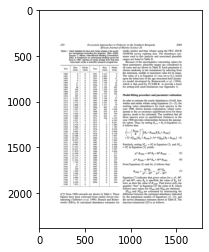

In [18]:
plt.imshow(image);

In [19]:
res = ocr_agent.detect(image, return_response=True)

In [20]:
res

{'text': '250\n\nEcosystem Approaches to Fisheries in the Southern Benguela\n\n2004\n\nAfrican Journal of Marine Science 26\n\nTable |: Catch statistics for blue and minke whales in the south-\nern hemisphere (including the Antarctic; 1900-2000).\nSource: C. Allison, International Whaling Commission,\n2002. A moratorium on commercial whaling came into\nforce in 1987; catches of minke whales from that time\nhave been under a scientific research programme\n\n \n\n \n\n \n\nYear Blue Minke Year Blue Minke\n\nwhale whale whale whale\n1900 0 0 1951 5 147 9\n1901 0 0 1952 4002 0\n1902 0 0 1953 2 888 12\n1903 0 0 1954 2544 0\n1904 11 0 1955 1749 45\n1905 51 0 1956 1715 46\n1906 68 0 1957 1769 493\n1907 106 0 1958 1250 103\n1908 245 0 1959 936 206\n1909 212 0 1960 1743 162\n1910 387 0 1961 1143 2\n1911 1235 0 1962 1748 21\n1912 2505 0 1963 1508 104\n1913 2774 0 1964 3 347 51\n1914 4 888 0 1965 1477 719\n1915 5 636 0 1966 665 374\n1916 4387 0 1967 462 1099\n1917 3173 0 1968 674 618\n1918 2 046 

## Deep Learning Detection (Example 2)

In [21]:
%%time
model = lp.Detectron2LayoutModel(
            config_path ='lp://TableBank/faster_rcnn_R_101_FPN_3x/config', # In model catalog
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


CPU times: user 1.01 s, sys: 484 ms, total: 1.49 s
Wall time: 1.44 s


In [22]:
%%time
layout = model.detect(image)

CPU times: user 7.47 s, sys: 721 ms, total: 8.19 s
Wall time: 7.52 s


CPU times: user 5.84 ms, sys: 819 µs, total: 6.66 ms
Wall time: 5.46 ms


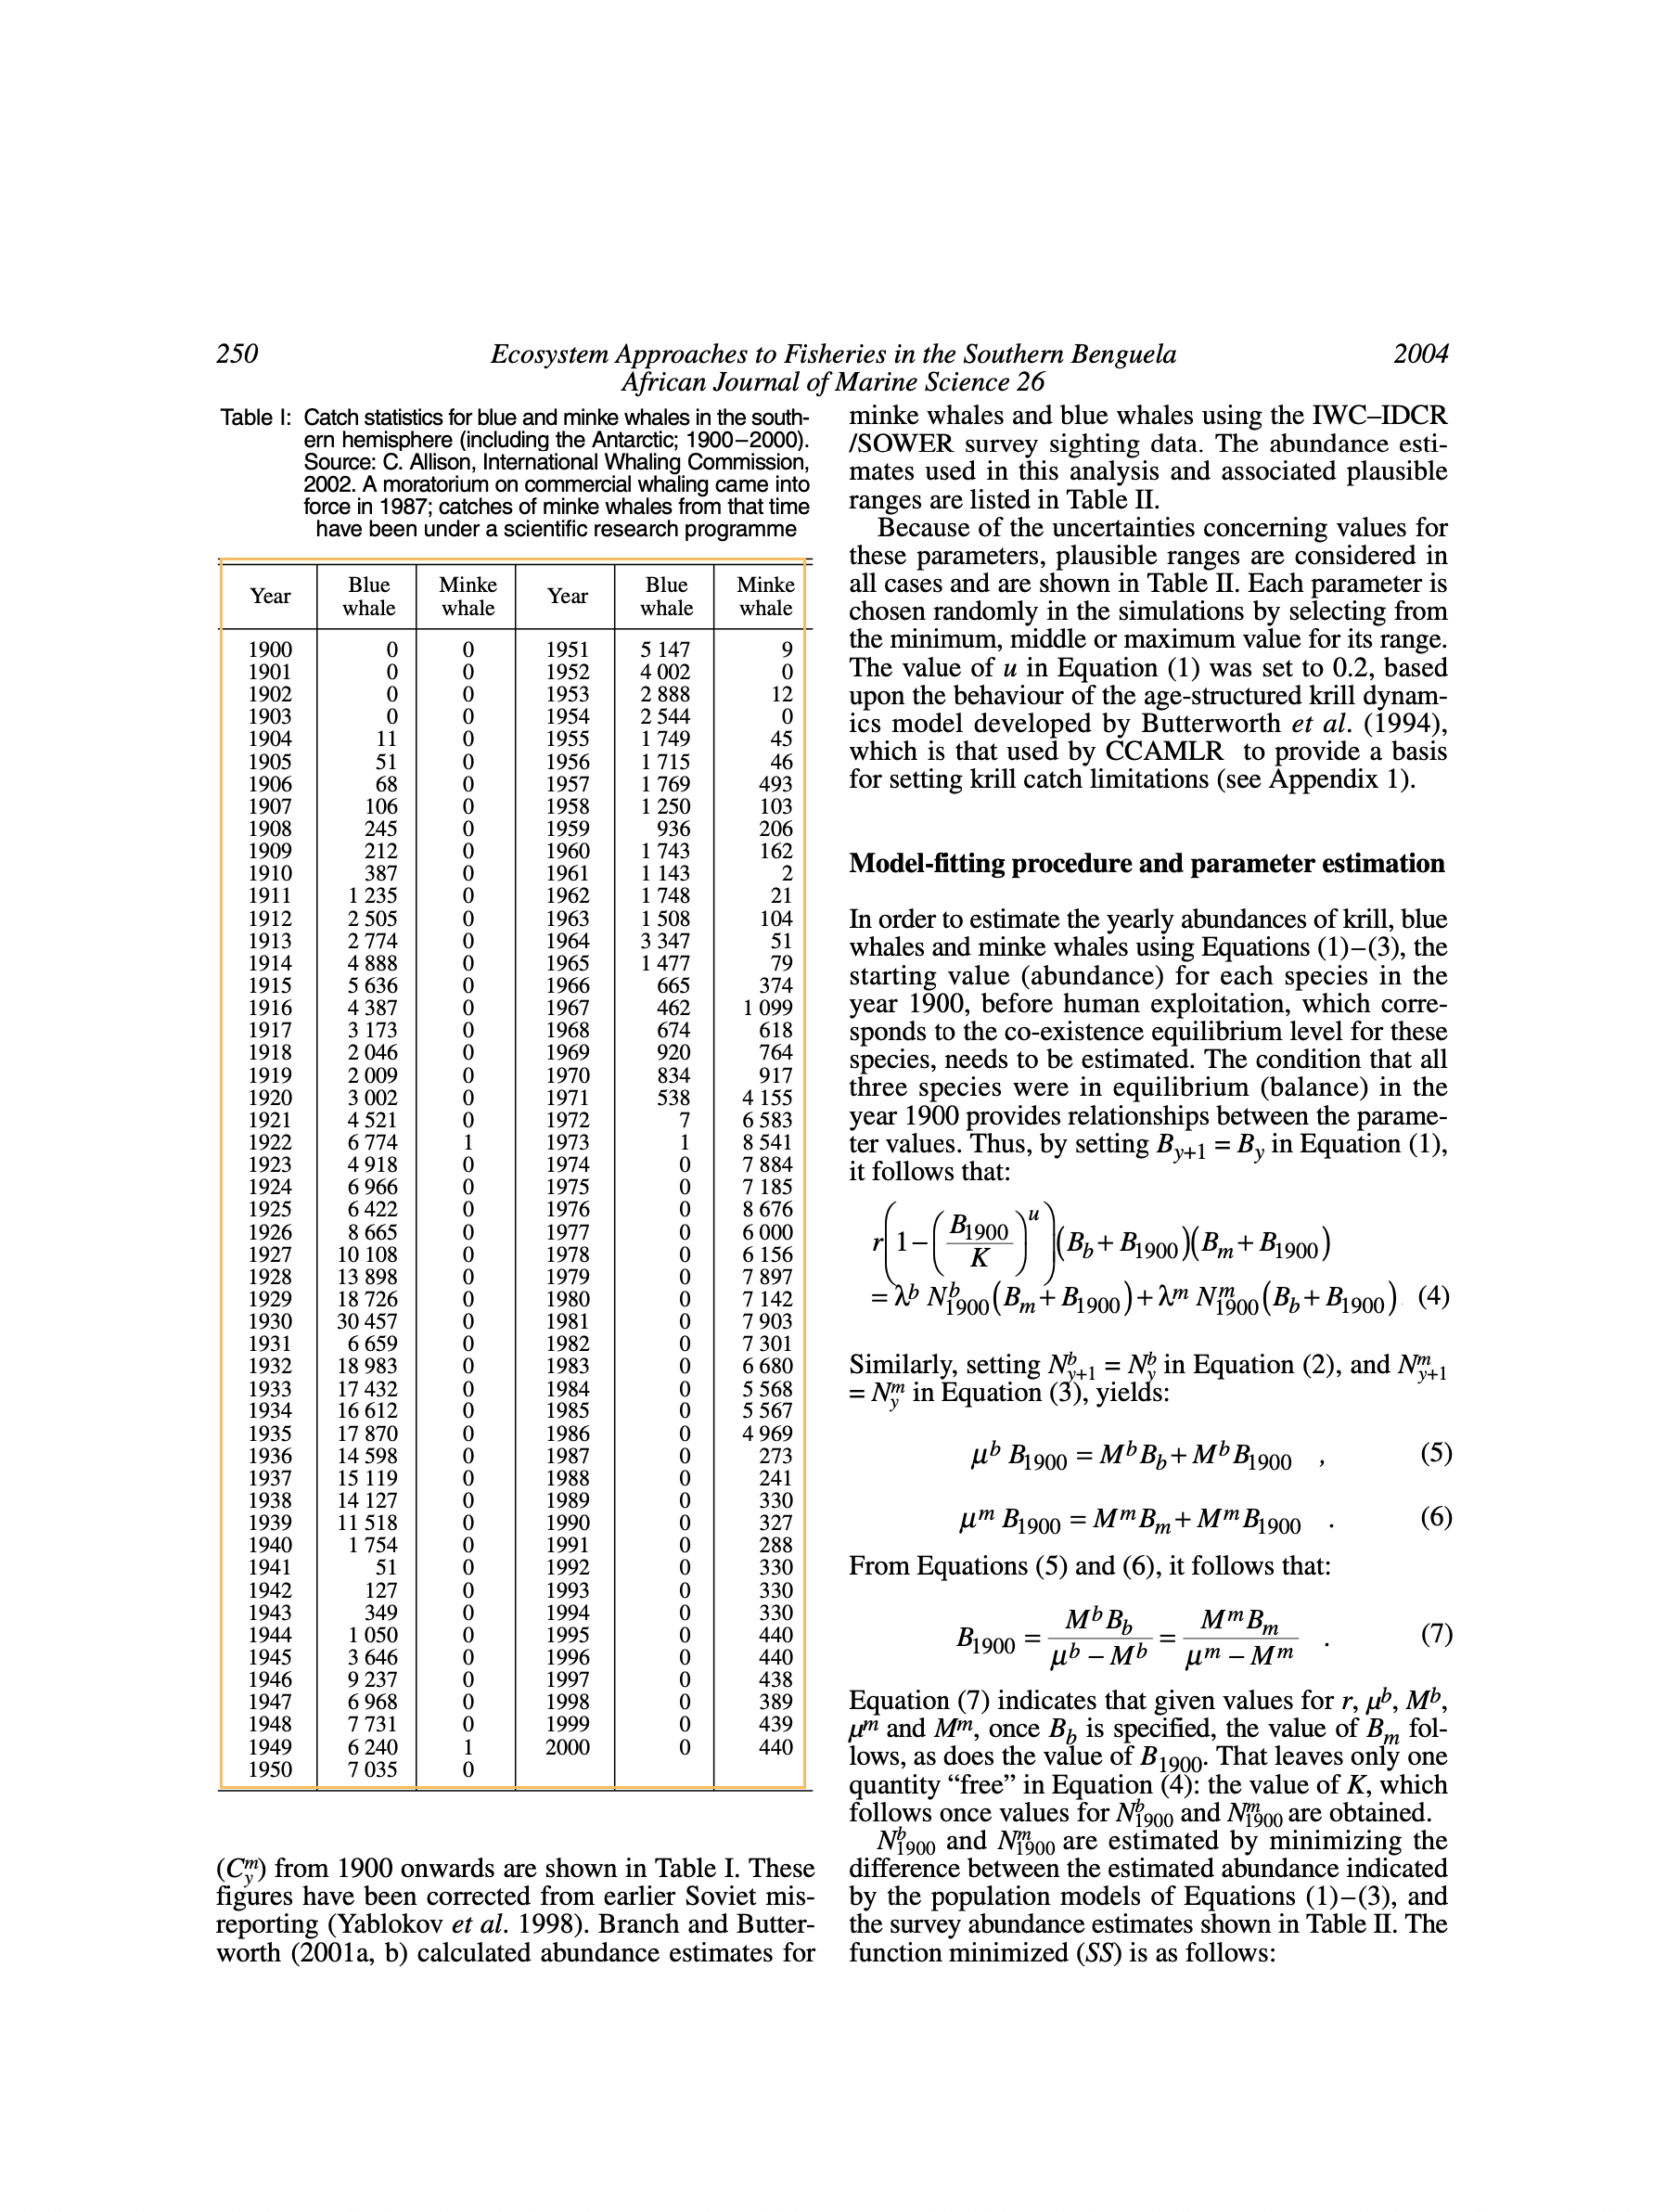

In [23]:
%%time
lp.draw_box(image, layout, box_width=3)

### Grabbing Text (Example 2

In [24]:
type(layout)

layoutparser.elements.Layout

Only grab the Tables that are detected on the page, not the other sections/figures.

In [25]:
tables = lp.Layout([b for b in layout if b.type == 'Table'])

In [26]:
tables

Layout(_blocks=[TextBlock(block=Rectangle(x_1=237.1259307861328, y_1=601.1100463867188, x_2=868.0498046875, y_2=1927.3753662109375), text=None, id=None, type=Table, parent=None, next=None, score=0.9971855282783508)], page_data={})

In [27]:
%%time
for t in tables:
    segment_image = (t
                    .pad(left=5, right=5, top=5, bottom=5)
                    .crop_image(image))
    text = ocr_agent.detect(segment_image)
    t.set(text=text, inplace=True)

CPU times: user 286 ms, sys: 25.6 ms, total: 312 ms
Wall time: 3.2 s


In [28]:
for txt in tables.get_texts():
    print(txt, end='\n---\n')

 

 

 

 

 

 

 

 

Year Blue Minke Year Blue Minke

whale whale whale whale
1900 0 0 1951 5 147 9
1901 0 0 1952 4002 0
1902 0 0 1953 2 888 12
1903 0 0 1954 2544 0
1904 11 0 1955 1749 45
1905 51 0 1956 1715 46
1906 68 0 1957 1769 493
1907 106 0 1958 1250 103
1908 245 0 1959 936 206
1909 212 0 1960 1743 162
1910 387 0 1961 1143 2
1911 1235 0 1962 1748 21
1912 2505 0 1963 1508 104
1913 2774 0 1964 3 347 51
1914 4 888 0 1965 1477 719
1915 5 636 0 1966 665 374
1916 4387 0 1967 462 1099
1917 3173 0 1968 674 618
1918 2 046 0 1969 920 764
1919 2009 0 1970 834 917
1920 3 002 0 1971 538 4155
1921 4521 0 1972 7 6583
1922 6774 1 1973 1 8 541
1923 4918 0 1974 0 7 884
1924 6 966 0 1975 0 7185
1925 6 422 0 1976 0 8 676
1926 8 665 0 1977 0 6 000
1927 10 108 0 1978 0 6 156
1928 13 898 0 1979 0 7897
1929 18 726 0 1980 0 7142
1930 30 457 0 1981 0 7 903
1931 6 659 0 1982 0 7301
1932 18 983 0 1983 0 6 680
1933 17 432 0 1984 0 5 568
1934 16 612 0 1985 0 5 567
1935 17 870 0 1986 0 4969
1936 14598 0 1987

# How well does it do at parsing all the information on the page?

In [9]:
ocr_agent = lp.ocr.TesseractAgent()
image = cv2.imread("/Volumes/DATA_LAKE/example_images/page3.png")
type(image)

numpy.ndarray

In [3]:
%%time
model = lp.Detectron2LayoutModel(
            config_path ='lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config', # In model catalog
            label_map   ={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

CPU times: user 3.07 s, sys: 2.88 s, total: 5.95 s
Wall time: 6.11 s


In [4]:
%%time
layout = model.detect(image)

CPU times: user 22.7 s, sys: 2.09 s, total: 24.8 s
Wall time: 23.8 s


CPU times: user 10.4 ms, sys: 2.73 ms, total: 13.2 ms
Wall time: 11 ms


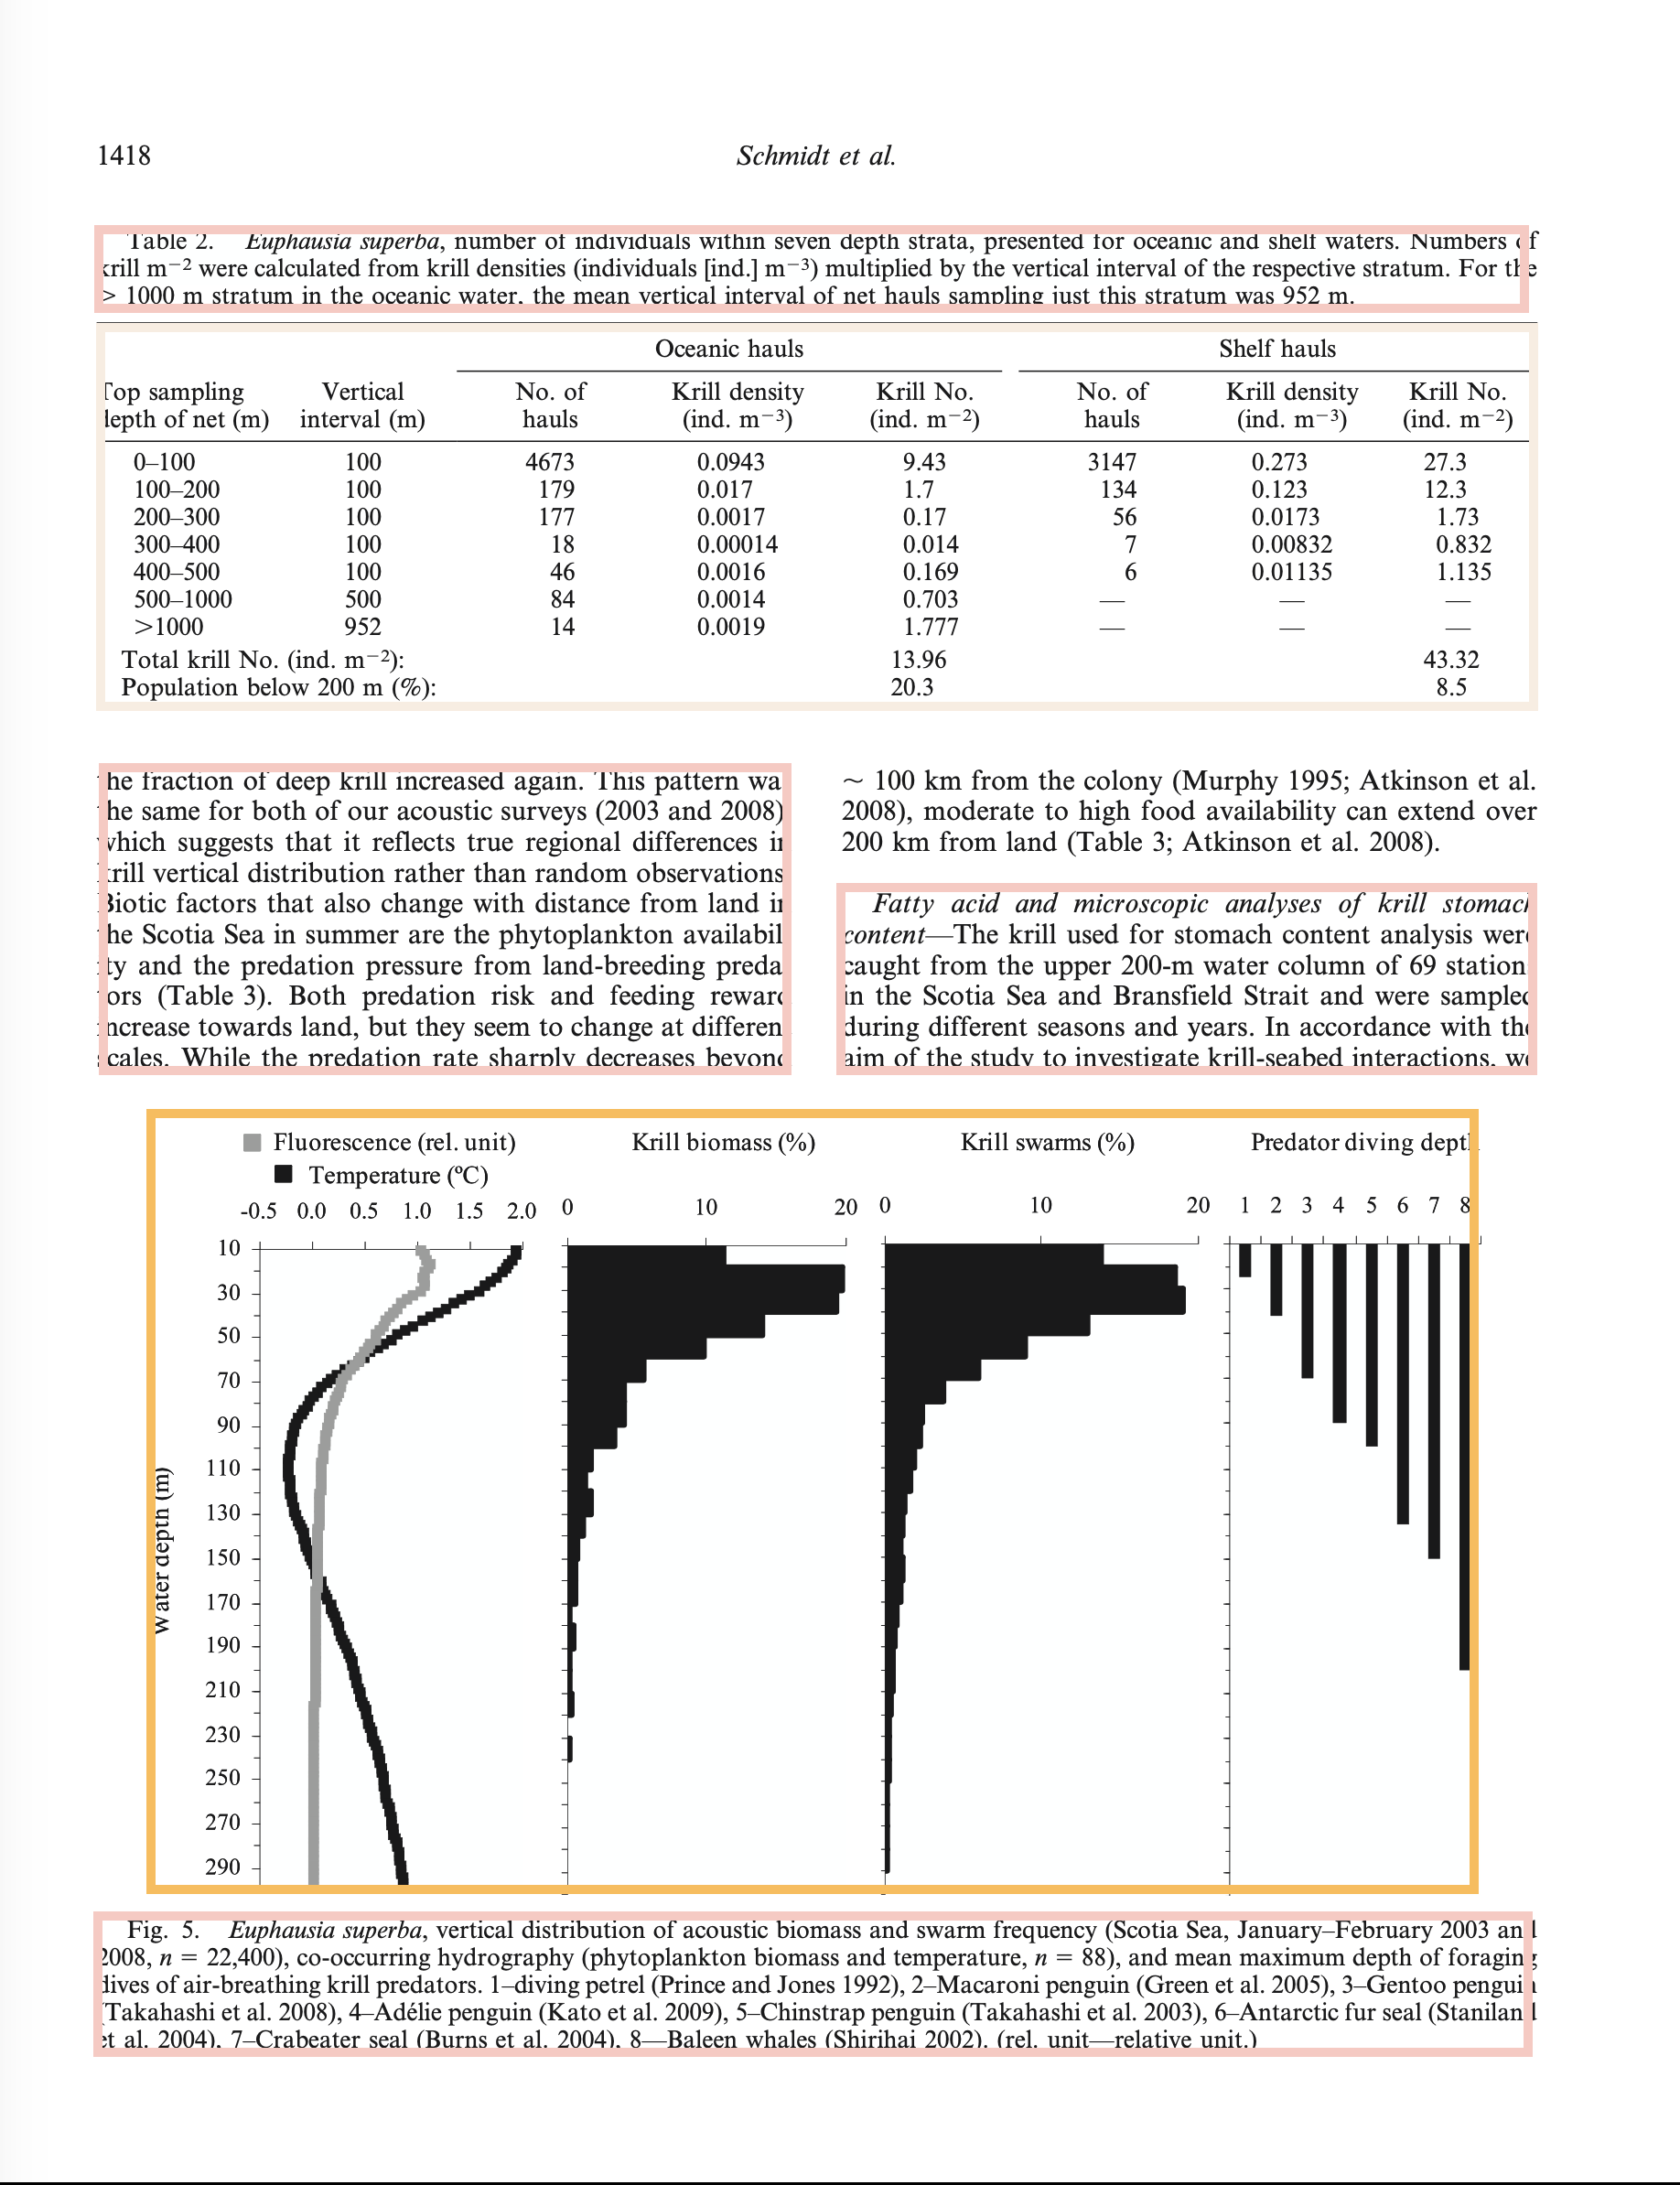

In [5]:
%%time
lp.draw_box(image, layout, box_width=10)

In [6]:
text_blocks = lp.Layout([b for b in layout if b.type == 'Text'])
table_blocks = lp.Layout([b for b in layout if b.type == 'Table'])
figure_blocks = lp.Layout([b for b in layout if b.type == 'Figure'])

# Print the text blocks

In [7]:
%%time

for block in text_blocks:
    segment_image = (block
                    .pad(left=5, right=5, top=5, bottom=5)
                    .crop_image(image))
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

CPU times: user 600 ms, sys: 92.2 ms, total: 692 ms
Wall time: 11.3 s


In [22]:
text_blocks.get_texts()[0]

'the fraction of deep krill increased again. This pattern was\nthe same for both of our acoustic surveys (2003 and 2008),\nwhich suggests that it reflects true regional differences in\nkrill vertical distribution rather than random observations.\nBiotic factors that also change with distance from land in\nthe Scotia Sea in summer are the phytoplankton availabil-\nity and the predation pressure from land-breeding preda-\ntors (Table 3). Both predation risk and feeding reward\nincrease towards land, but they seem to change at different\nscales. While the predation rate sharply decreases beyond\n\x0c'

In [26]:
for paragraph in text_blocks.get_texts():
    if 'Fig' in paragraph[:20]:
        print(paragraph)
    if 'Table' in paragraph[:20]:
        print(paragraph)

Fig. 5. Euphausia superba, vertical distribution of acoustic biomass and swarm frequency (Scotia Sea, January-February 2003 and
2008, n = 22,400), co-occurring hydrography (phytoplankton biomass and temperature, n = 88), and mean maximum depth of foraging
dives of air-breathing krill predators. 1—diving petrel (Prince and Jones 1992), 2-Macaroni penguin (Green et al. 2005), 3-Gentoo penguin
(Takahashi et al. 2008), 4-Adélie penguin (Kato et al. 2009), 5—Chinstrap penguin (Takahashi et al. 2003), 6-Antarctic fur seal (Staniland
et al. 2004), 7-Crabeater seal (Burns et al. 2004), 8—Baleen whales (Shirihai 2002). (rel. unit—relative unit.)

Table 2. Euphausia superba, number of individuals within seven depth strata, presented for oceanic and shelf waters. Numbers o:
krill m~2 were calculated from krill densities (individuals [ind.] m~3) multiplied by the vertical interval of the respective stratum. For the
> 1000 m stratum in the oceanic water, the mean vertical interval of net hauls sam

In [8]:
for i, txt in enumerate(text_blocks.get_texts()):
    print("-"*20)
    print(f"TEXT BLOCK #{i}\n")
    print(txt)

--------------------
TEXT BLOCK #0

the fraction of deep krill increased again. This pattern was
the same for both of our acoustic surveys (2003 and 2008),
which suggests that it reflects true regional differences in
krill vertical distribution rather than random observations.
Biotic factors that also change with distance from land in
the Scotia Sea in summer are the phytoplankton availabil-
ity and the predation pressure from land-breeding preda-
tors (Table 3). Both predation risk and feeding reward
increase towards land, but they seem to change at different
scales. While the predation rate sharply decreases beyond

--------------------
TEXT BLOCK #1

Fig. 5. Euphausia superba, vertical distribution of acoustic biomass and swarm frequency (Scotia Sea, January-February 2003 and
2008, n = 22,400), co-occurring hydrography (phytoplankton biomass and temperature, n = 88), and mean maximum depth of foraging
dives of air-breathing krill predators. 1—diving petrel (Prince and Jones 1992), 

## Print the Table(s)

In [36]:
%%time

for block in table_blocks:
    segment_image = (block
                    .pad(left=5, right=5, top=5, bottom=5)
                    .crop_image(image))
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

CPU times: user 197 ms, sys: 15.7 ms, total: 213 ms
Wall time: 1.79 s


In [37]:
%%time
for i, txt in enumerate(table_blocks.get_texts()):
    print("-"*20)
    print(f"TEXT BLOCK #{i}\n")
    print(txt)

--------------------
TEXT BLOCK #0

 

 

Oceanic hauls

Shelf hauls

 

 

Top sampling Vertical No. of Krill density Krill No. No. of Krill density Krill No.
depth of net (m) interval (m) hauls (ind. m~3) (ind. m~?) hauls (ind. m~3) (ind. m~?)
0-100 100 4673 0.0943 9.43 3147 0.273 27.3
100-200 100 179 0.017 1.7 134 0.123 12.3
200-300 100 177 0.0017 0.17 56 0.0173 1.73
300-400 100 18 0.00014 0.014 7 0.00832 0.832
400-500 100 46 0.0016 0.169 6 0.01135 1.135
500-1000 500 84 0.0014 0.703 _— — _—
>1000 952 14 0.0019 1.777 — _ —
Total krill No. (ind. m~2): 13.96 43.32

Population below 200 m (%): 20.3 8.5

 

CPU times: user 242 µs, sys: 124 µs, total: 366 µs
Wall time: 302 µs
